In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt


In [3]:
raw_train_data = pd.read_csv("train.csv")

## data analyst

In [4]:
raw_train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
map_count_name = {'1460': ['SalePrice'], '1201': ['LotFrontage'], '91': ['Alley'], '588': ['MasVnrType'], '1452': ['MasVnrArea'], '1423': ['BsmtFinType1'], '1422': ['BsmtFinType2'], '1459': ['Electrical'], '770': ['FireplaceQu'], '1379': ['GarageCond'], '7': ['PoolQC'], '281': ['Fence'], '54': ['MiscFeature']}

In [6]:
map_type_name = {'object': ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], 'int': ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']}

In [7]:
drop_columns = []
null_columns = []
for key, value in map_count_name.items():
    if int(key) <1000:
        drop_columns += value
        # print (key, value)
    elif int(key) != 1459 :
        null_columns += value
        # print (key, value)
print(null_columns)        
drop_columns

['SalePrice', 'LotFrontage', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinType2', 'GarageCond']


['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [8]:
cate_cols = [i for i in map_type_name['object'] if i not in drop_columns]
num_cols = [i for i in map_type_name['int'] if i not in drop_columns]
print(cate_cols)
print(num_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSo

In [9]:
nan_train_raw_data = raw_train_data[null_columns]
cate_train_raw_data = raw_train_data[cate_cols]
num_train_raw_data = raw_train_data[num_cols]

In [10]:
num_train_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### Note for numerical cols
+ ID: obviously i will drop this
+ MSSubclass: its not actually numerical, need to extract more or evaluate with target col
+ LotFrontage and LotArea: width and area 
+ overallquall and overallcond: rate for the house 
+ yearbuilt, yearremodadd: year
+ masVNrare: area used with type for masonry
+ BSMTFinSF1/2/Un (basement): area used with type for basement
+ FloorSF1/2/LowQualFinSF: can calculate % 
+ BSMTFullbath/BSMTHalfBath: number of bath in basement 
+ FullBath/HalfBath: number of bath above ground
+ BedroomAbvGround/Kitchen/Total: number of bedroom abv ground
+ GarageYrBlt: year garage was built 
+ Misc: used with feature
+ MoSold: Month Sold (MM)
+ YrSold: Year Sold (YYYY)

**Overall**: 
There are some feature that can used with its category  
Time can be calculate more clearly  
can calculate the sum/the ratio of Surface/numbers 




In [11]:
raw_train_data[cate_cols].describe().iloc[:,24:]


,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,6,5,2,5,4,7,6,3,5,5,3,9,6
top,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,1267,1198


In [12]:
# most_common_value = cate_train_raw_data['MSZoning'].mode()[0]
# cate_train_raw_data['MSZoning'] = cate_train_raw_data['MSZoning'].fillna(most_common_value)

# cate_train_raw_data['MSZoning'].describe()
raw_train_data['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

['TA' 'Gd' 'Fa' 'Po' 'Ex']


d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


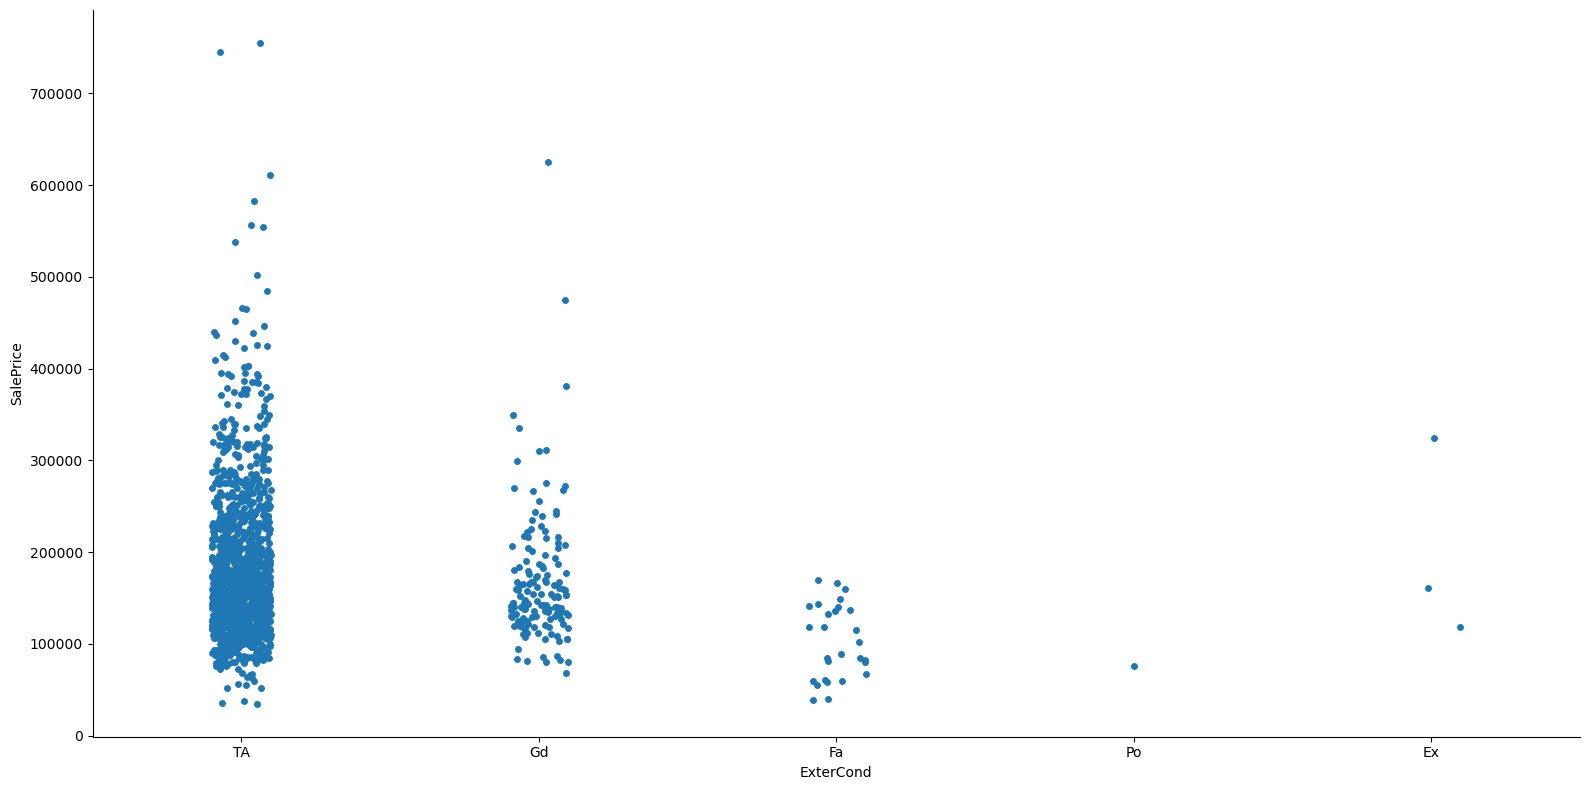

In [13]:
import seaborn as sns
all_zoning_types = raw_train_data['ExterCond'].unique()
print(all_zoning_types)
sns.catplot(data=raw_train_data, x="ExterCond", y="SalePrice", order=all_zoning_types, height=8, aspect=2)

### Note for category cols
+ change MSZoning to RM+C+RH, RL and FV
+ Drop: street, Utilities, LandSlope, RoofStyle, RoofMatl
+ LotShape: Reg + IR1 and IR2+IR3
+ LandContour: Bnk and low +Lvl + HLS 
+ LotConfig: FR2 and Inside +Corner Lotconfig + CulDSac + FR3 
+ Neighborhood: CollgCr+Veenker+NWames +ClearCR+SawỷerW neighbor+Crawfor+Somerst, Noridge + Nridght+Stonebr, Mitchel +Names, OldTown+BrkSide+Sawyer+IDOTRR+Edwards+SWISU, meadowV+NPkVill+BrDale+BlueSte, and Timber + Gilbert+BLMngtn
+ BldgType: 2fmCon + Duplex + Twnhs and lfarm+TwnhsE
+ HouseStyle: 2Story+1Story and 1.5Fin + 1.5Unf + Sfoyer + SLvl + 2.5Unf+2.5Fin
+ Exterior1st: VinylSd+BrkFace+CemntBd+Stone+Imstucc, MetalSd+WdSdng+HdBoard + WdShing+Plywood+stucco and asbshng+brkcomm+AsphShn+Cblock 
+ Exterior2nd: VinylSd+CmentBd+BrkFace+ImStucc+other  and MetalSd+Wd Shng+HdBoard+Plywood + wd Sdng+asbShng+BrkCmn+AsphShn+Stone +Cblock
+ HeatingQC+KitchenQual, ExterQual, ExterCond, BsmtQual, BsmtCond: can be numericalize
+ BsmtFinType1: GLQ and ALQ + UNF+REC + BLQ +LwQ (nan to 2nd group)
+ CentralAir: binary
+ GarageType: Attchd + Buitin and Detchd carport +basement + 2types (nan should be 2nd group)
+ GarageFinish: Fin 3, Rfn:2 Unf:1 (nan should be 1)
+ PavedDrive: Y 3, P 2, N 1
+ SaleType: WD + COn, New and COD+ConLD + COnLi+CWD + Oth
+ SaleCondition: Partial, Abnorml+AdjLand+Alloca+Family and Normal  
**Overall**:  
There is hardly some cols that can have clear pattern  
some cols like Qual and Cond can be converted to numerical  
Cluttering can be apply to many cols
Some cols the imbalance is too great to use  




## feature selection

In [14]:
from sklearn.impute import SimpleImputer

# Assuming you already have num_cols and num_train_raw_data defined from previous steps

# Identify columns with missing values
null_numerical_cols = [i for i in num_cols if num_train_raw_data[i].isnull().sum() > 0]

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on num_train_raw_data (only the columns with missing values)
imputer.fit(num_train_raw_data[null_numerical_cols])

# Transform num_train_raw_data to fill missing values (only in relevant columns)
filled_num_train_data = imputer.transform(num_train_raw_data[null_numerical_cols])

# Convert the filled data back into a DataFrame
filled_num_train_data = pd.DataFrame(filled_num_train_data, 
                                     columns=null_numerical_cols)  

# Optionally, join back with the original data for unchanged columns:
filled_num_train_data = pd.concat([
    num_train_raw_data.drop(null_numerical_cols, axis=1),  # Original data without missing value columns
    filled_num_train_data
], axis=1)



In [15]:

# Now calculate correlations using the filled data
corr_matrix_num_train = filled_num_train_data.corr()
corr_matrix_num_train['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### Select data

In [16]:
clutter_cols = {
    "MSZoning": [['RM', 'C (all)', 'RH'],["FV"],["RL"]],
    "LotShape": [['Reg', 'IR1'], ['IR2', 'IR3']],
    "LandContour": [['Lvl','HLS', 'Low'],['Bnk']],
    "LotConfig": [['FR2'],['Inside', 'Corner','CulDSac', 'FR3']],
    "Neighborhood": [['CollgCr', 'Veenker', 'NWAmes','ClearCr','Sawyer','Crawfor','Somerst'],
                     ['NoRidge','NridgHt','StoneBr'],
                     ['Mitchel','NAmes'],
                     ['OldTown','BrkSide','SawyerW','IDOTRR','Edwards','SWISU'],
                     ['MeadowV','NPkVill','BrDale','Blueste'],
                     ['Timber','Gilbert','Blmngtn']],
    "BldgType":[['1Fam', 'TwnhsE'], ['Twnhs', 'Duplex', '2fmCon']],
    "HouseStyle":[["2Story", "1Story"], ["1.5Fin", "1.5Unf", "SFoyer", "SLvl", "2.5Unf", "2.5Fin"]],
    "Exterior1st":[['VinylSd', 'BrkFace', 'CemntBd', 'Stone', 'ImStucc'],["MetalSd", "Wd Sdng", "HdBoard", "WdShing", "Plywood", "Stucco"], ["AsbShng", "BrkComm", "AsphShn", "CBlock"]],
    "Exterior2nd":[['VinylSd', 'CmentBd', 'BrkFace', 'ImStucc','Other'],["MetalSd", "HdBoard", "Plywood", "Wd Sdng","Wd Shng", "AsbShng", "Brk Cmn", "AsphShn", "Stone", "CBlock","Stucco"]],
    "BsmtFinType1": [['GLQ'], ['ALQ','Unf', 'Rec', 'BLQ', 'LwQ',np.nan]],
    "GarageType": [['Attchd', 'BuiltIn'], ['Detchd', 'CarPort', 'Basment', '2Types',np.nan]],
    "SaleType": [["WD","Con"], ["New"], ["COD","ConLD","ConLI","ConLw","CWD","Oth"]],
    "SaleCondition":[["Partial"],["Abnorml","AdjLand","Alloca","Family"],["Normal"]]
}
numericalize_cols = {
    'HeatingQC':{"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    'KitchenQual':{"Ex":5, "Gd":4, "TA":3, "Fa":2},
    'ExterQual':{"Ex":5, "Gd":4, "TA":3, "Fa":2},
    'BsmtQual':{"Ex":5, "Gd":4, "TA":3, "Fa":2,np.nan:2},
    'BsmtCond':{"Ex":5, "Gd":4, "TA":3, "Fa":2,np.nan:1,'Po':1},
    'GarageFinish':{"Fin":3,"RFn":2,"Unf":1,np.nan:1},
    'PavedDrive':{'Y':3,'P':2,'N':1},
    'CentralAir':{'Y':1,'N':0},
}


In [17]:
processed_cate_train_data = pd.DataFrame()

def handle_a_col_of_clutter(clutter_col_name:str):
    processed_cate_train_data[clutter_col_name] = cate_train_raw_data[clutter_col_name]
    value_maps = {}
    for clut_groups in clutter_cols[clutter_col_name]:
        for clut_group in clut_groups:
            value_maps[clut_group] = clut_groups[0]
        pass
    processed_cate_train_data[clutter_col_name] = processed_cate_train_data[clutter_col_name].map(value_maps)
for col_name in clutter_cols:
    handle_a_col_of_clutter(col_name)



In [18]:
processed_cate_train_data.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
cate_num_train_data = pd.DataFrame()
def handle_a_col_of_cate_num(cate_num:str):
    cate_num_train_data[cate_num] = cate_train_raw_data[cate_num]
    cate_num_train_data[cate_num] = cate_num_train_data[cate_num].map(numericalize_cols[cate_num])
for col_name in numericalize_cols:
    handle_a_col_of_cate_num(col_name)
cate_num_train_data.columns

Index(['HeatingQC', 'KitchenQual', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'GarageFinish', 'PavedDrive', 'CentralAir'],
      dtype='object')

### Handle the num cols with num-cate cols

In [20]:
multiply_cols ={
    "KitchenOverall": ["KitchenAbvGr", "KitchenQual"],
    # "ExterOverall": ["ExterQual", "Exter"],
    "BsmtOverall": ["TotalSF", "BsmtQual"],
    "GarageOverall": ["GarageArea", "GarageFinish"],
}


In [21]:
added_num_train_data = filled_num_train_data.copy()
added_num_train_data['TotalSF'] = raw_train_data['TotalBsmtSF'] + raw_train_data['1stFlrSF'] + raw_train_data['2ndFlrSF']
added_num_train_data['TotalBath'] = raw_train_data['FullBath'] + raw_train_data['HalfBath']
added_num_train_data['GapInSell'] = raw_train_data['YrSold'] - raw_train_data['YearBuilt']
added_num_train_data.drop(['FullBath','HalfBath','TotalBsmtSF','1stFlrSF','2ndFlrSF','YrSold','YearBuilt'],axis=1,inplace=True)

In [22]:
combined_num_train_data = pd.concat([pd.DataFrame(added_num_train_data), cate_num_train_data], axis=1)
for col in multiply_cols:
    combined_num_train_data[col] = combined_num_train_data[multiply_cols[col][0]] * combined_num_train_data[multiply_cols[col][1]]
    combined_num_train_data.drop(multiply_cols[col], axis=1, inplace=True)



In [23]:
def plot_num(df: pd.DataFrame):
    n_cols = len(df.columns) - 1  # Excluding the target
    rows, cols = ((n_cols) // 4)+1 , 4  # Adjust for desired layout
    # print(n_cols)
    # print(rows,cols)
    # 1. Scatter Plots as Subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 24))  

    for i, col in enumerate(df.columns):
        if col != 'SalePrice':
            # print(i)
            # print(i//rows,i%cols)
            ax = axes[i//cols][i%cols]
            ax.scatter(df[col], df['SalePrice'])
            ax.set_xlabel(col)
            ax.set_ylabel('SalePrice')

    # fig.tight_layout()  
    plt.show()

    # # 2. Box Plots as Subplots
    # fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 8)) 

    # for i, col in enumerate(added_num_train_data.columns):
    #     row, col = i // cols, i % cols
    #     axes[row, col].boxplot(added_num_train_data[col], vert=False)
    #     axes[row, col].set_title(col)  

    # fig.tight_layout()
    # plt.show() 

# plot_num(added_num_train_data)

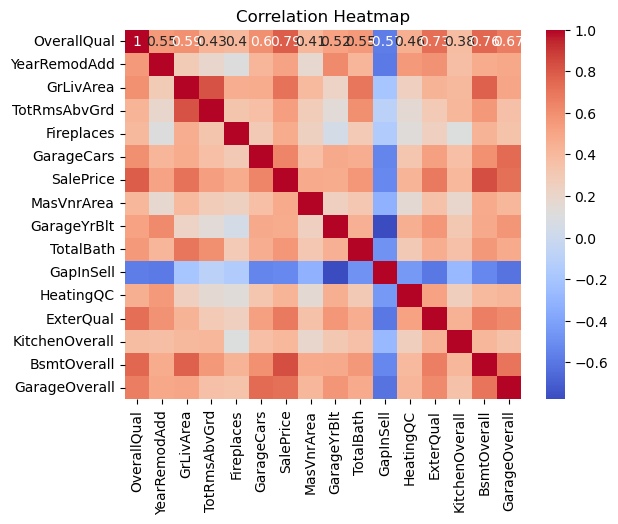

In [24]:
# Now calculate correlations using the filled data
corr_matrix_num_train = combined_num_train_data.corr()
corr_matrix_num_train['SalePrice'].sort_values(ascending=False)
correlation_threshold = 0.4
selected_features = corr_matrix_num_train[abs(corr_matrix_num_train['SalePrice']) >= correlation_threshold].index.tolist()
selected_num_train_data = combined_num_train_data[selected_features]
sns.heatmap(selected_num_train_data.corr(), annot=True, cmap='coolwarm')  
plt.title('Correlation Heatmap')
plt.show()

# corr_matrix_num_train['SalePrice'][selected_features]

### handle cate cols

In [25]:
from sklearn.preprocessing import OneHotEncoder 
dummied_cate_train_data = pd.get_dummies(processed_cate_train_data)
dummied_cate_train_data

,MSZoning_FV,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_Lvl,LotConfig_FR2,LotConfig_Inside,Neighborhood_CollgCr,...,BsmtFinType1_ALQ,BsmtFinType1_GLQ,GarageType_Attchd,GarageType_Detchd,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,False,True,False,False,True,False,True,False,True,True,...,False,True,True,False,False,False,True,False,True,False
1,False,True,False,False,True,False,True,True,False,True,...,True,False,True,False,False,False,True,False,True,False
2,False,True,False,False,True,False,True,False,True,True,...,False,True,True,False,False,False,True,False,True,False
3,False,True,False,False,True,False,True,False,True,True,...,True,False,False,True,False,False,True,True,False,False
4,False,True,False,False,True,False,True,True,False,False,...,False,True,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,True,False,False,True,False,True,False,True,False,...,True,False,True,False,False,False,True,False,True,False
1456,False,True,False,False,True,False,True,False,True,True,...,True,False,True,False,False,False,True,False,True,False
1457,False,True,False,False,True,False,True,False,True,True,...,False,True,True,False,False,False,True,False,True,False
1458,False,True,False,False,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,True,False


In [26]:
full_train_data = pd.concat([selected_num_train_data, dummied_cate_train_data], axis=1)

In [27]:
full_train_data.describe()

,OverallQual,YearRemodAdd,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice,MasVnrArea,GarageYrBlt,TotalBath,GapInSell,HeatingQC,ExterQual,KitchenOverall,BsmtOverall,GarageOverall
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000
mean,6.099315,1984.865753,1515.463699,6.517808,0.613014,1.767123,180921.195890,103.685262,1978.506164,1.947945,36.547945,4.145205,3.39589,3.650000,9391.967123,910.031507
std,1.382997,20.645407,525.480383,1.625393,0.644666,0.747315,79442.502883,180.569112,23.994583,0.794965,30.250152,0.959501,0.57428,0.858035,4455.543587,659.495081
min,1.000000,1950.000000,334.000000,2.000000,0.000000,0.000000,34900.000000,0.000000,1900.000000,0.000000,0.000000,1.000000,2.00000,0.000000,668.000000,0.000000
25%,5.000000,1967.000000,1129.500000,5.000000,0.000000,1.000000,129975.000000,0.000000,1962.000000,1.000000,8.000000,3.000000,3.00000,3.000000,6309.000000,395.000000
50%,6.000000,1994.000000,1464.000000,6.000000,1.000000,2.000000,163000.000000,0.000000,1978.506164,2.000000,35.000000,5.000000,3.00000,4.000000,8652.000000,797.500000
75%,7.000000,2004.000000,1776.750000,7.000000,1.000000,2.000000,214000.000000,164.250000,2001.000000,3.000000,54.000000,5.000000,4.00000,4.000000,11524.000000,1293.250000
max,10.000000,2010.000000,5642.000000,14.000000,3.000000,4.000000,755000.000000,1600.000000,2010.000000,4.000000,136.000000,5.000000,5.00000,9.000000,58760.000000,4254.000000


## Choose Model

In [28]:
def evaluate_model(X: np.ndarray, y: np.ndarray, model, model_name):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    print("RMSE on", model_name, np.sqrt(-scores).mean())
    

In [29]:
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVR
scaler = StandardScaler()
normalizer = Normalizer()
X = full_train_data.drop('SalePrice', axis=1)
y = full_train_data['SalePrice']
X_scaled = scaler.fit_transform(X)
lin_reg = LinearRegression()
log_reg = LogisticRegression()
sgd_reg = SGDRegressor()
svr_linear_reg = SVR(kernel="linear", C=100, epsilon=0.1)
svr_poly_reg = SVR(kernel="poly", degree=3, C=100, epsilon=0.1)
svr_sigmoid_reg = SVR(kernel="sigmoid", C=100, epsilon=0.1)
svr_rbf_reg = SVR(kernel='rbf', C=100, epsilon=0.1)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=5,min_samples_split=5)
evaluate_model(X_scaled, y, lin_reg, "lin_reg")
# evaluate_data(X_scaled, y, log_reg, "log_reg")
evaluate_model(X_scaled, y, sgd_reg, "sgd_reg")
evaluate_model(X_scaled, y, svr_linear_reg, "svr_linear_reg")
evaluate_model(X_scaled, y, svr_poly_reg, "svr_poly_reg")
evaluate_model(X_scaled, y, svr_sigmoid_reg, "svr_sigmoid_reg")
evaluate_model(X_scaled, y, svr_rbf_reg, "svr_rbf_reg")
evaluate_model(X_scaled, y, rf_reg, "rf_reg")

RMSE on lin_reg 33681.05793373285
RMSE on sgd_reg 34553.109184660185
RMSE on svr_linear_reg 33571.184909854914
RMSE on svr_poly_reg 73639.75368980799
RMSE on svr_sigmoid_reg 66605.9114006246
RMSE on svr_rbf_reg 75992.33161263613
RMSE on rf_reg 31365.796584972537


### Perform ExtraTree to choose feature

In [30]:
X_df = pd.DataFrame(X_scaled, columns=full_train_data.columns.drop('SalePrice'))
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_df, y)
feat_importances = {"feat_name":X_df.columns, "importance":extra_reg.feature_importances_}
feat_importances = pd.DataFrame(feat_importances).sort_values(by='importance', ascending=False).reset_index(drop=True)
feat_importances['accumulate_importance'] = feat_importances.importance.cumsum()
display(feat_importances)

# feat_importances[['feat_name','importance']].plot(kind='barh', x= 'feat_name', y='importance', figsize=(6,6))
# plt.show()

,feat_name,importance,accumulate_importance
0,BsmtOverall,0.223171,0.223171
1,OverallQual,0.203563,0.426734
2,Neighborhood_NoRidge,0.130535,0.557268
3,ExterQual,0.107936,0.665204
4,GarageCars,0.092463,0.757667
5,GrLivArea,0.051125,0.808793
6,TotalBath,0.019211,0.828004
7,GarageOverall,0.017153,0.845157
8,Fireplaces,0.016516,0.861674
9,YearRemodAdd,0.010696,0.872370


In [31]:
over_90_index = feat_importances[feat_importances['accumulate_importance'] > 0.9].index[0]
top_fts = feat_importances.loc[:over_90_index, 'feat_name'].to_list()

top_fts

['BsmtOverall',
 'OverallQual',
 'Neighborhood_NoRidge',
 'ExterQual',
 'GarageCars',
 'GrLivArea',
 'TotalBath',
 'GarageOverall',
 'Fireplaces',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GapInSell',
 'KitchenOverall']

In [32]:
final_train_data = X_df[top_fts]
evaluate_model(final_train_data, y, lin_reg, "lin_reg")
# evaluate_data(X_scaled, y, log_reg, "log_reg")
evaluate_model(final_train_data, y, sgd_reg, "sgd_reg")
evaluate_model(final_train_data, y, svr_linear_reg, "svr_linear_reg")
evaluate_model(final_train_data, y, svr_poly_reg, "svr_poly_reg")
evaluate_model(final_train_data, y, svr_sigmoid_reg, "svr_sigmoid_reg")
evaluate_model(final_train_data, y, svr_rbf_reg, "svr_rbf_reg")
evaluate_model(final_train_data, y, rf_reg, "rf_reg")

RMSE on lin_reg 33907.880273397735
RMSE on sgd_reg 34032.10162180304
RMSE on svr_linear_reg 34748.0583720099
RMSE on svr_poly_reg 56973.735454489244
RMSE on svr_sigmoid_reg 58919.445337593694
RMSE on svr_rbf_reg 73131.47720489748
RMSE on rf_reg 31542.387791752135


## Fine Tune

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(final_train_data, y, test_size=0.2,random_state=42)

In [34]:
param_grid = {
    'loss': ['squared_error'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.25,0.35, 0.5],
    'fit_intercept': [True, False],
    # 'learning_rate': ['invscaling', 'adaptive'],
    'max_iter':[10000],
    'early_stopping': [True],
    'tol': [10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(sgd_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(np.sqrt(-grid_search.best_score_))

{'alpha': 0.01, 'early_stopping': True, 'fit_intercept': True, 'l1_ratio': 0.35, 'loss': 'squared_error', 'max_iter': 10000, 'penalty': 'elasticnet', 'tol': 10}
35271.910404344846


Alpha: 0.001, Train MSE: 34200.933247155415, Validation MSE: 34294.897849863686
Alpha: 0.003, Train MSE: 34513.86995026248, Validation MSE: 34041.45498590957
Alpha: 0.005, Train MSE: 34272.87424128031, Validation MSE: 34245.819156439546
Alpha: 0.007, Train MSE: 34096.02174229302, Validation MSE: 34821.43215115171
Alpha: 0.009000000000000001, Train MSE: 34263.34296036358, Validation MSE: 35763.93617898266
Alpha: 0.011, Train MSE: 34093.52285867411, Validation MSE: 34913.198266718144
Alpha: 0.013000000000000001, Train MSE: 34101.74819671455, Validation MSE: 34726.722426672546
Alpha: 0.015, Train MSE: 34094.19012712589, Validation MSE: 34647.93500807727
Alpha: 0.017, Train MSE: 34103.29955336222, Validation MSE: 34990.496571668526
Alpha: 0.019000000000000003, Train MSE: 34097.259219701984, Validation MSE: 34741.335359491815
Alpha: 0.021, Train MSE: 34108.831870597656, Validation MSE: 34783.91544426379
Alpha: 0.023, Train MSE: 34392.51435006265, Validation MSE: 35866.348769756754
Alpha: 0.

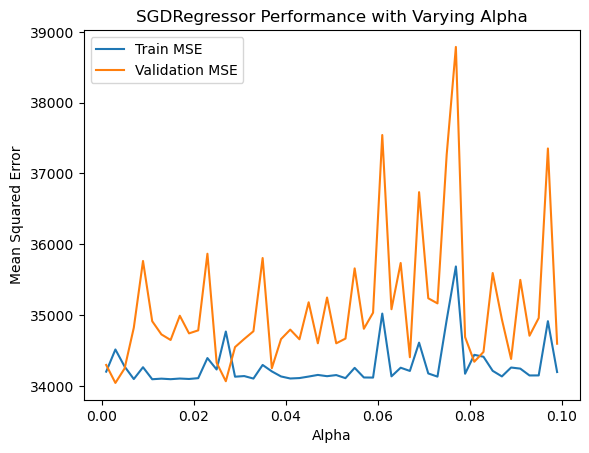

In [35]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

alpha_range = np.arange(0.001,0.1, 0.002)  # Example range of alpha values
train_mse = []
val_mse = []

for alpha in alpha_range:
    sgd_reg = SGDRegressor(loss='squared_error', alpha=alpha, penalty='elasticnet', l1_ratio=0.1,fit_intercept=True)
    sgd_reg.fit(X_train, y_train)
    
    y_train_pred = sgd_reg.predict(X_train)
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mse.append(train_error)
    
    y_val_pred = sgd_reg.predict(X_val)
    val_error = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mse.append(val_error)
    
    print(f"Alpha: {alpha}, Train MSE: {train_error}, Validation MSE: {val_error}")

# Plotting
plt.plot(alpha_range, train_mse, label='Train MSE')
plt.plot(alpha_range, val_mse, label='Validation MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('SGDRegressor Performance with Varying Alpha')
# plt.xscale('log')  # Use log scale for better visualization if alpha range is wide
plt.legend()
plt.show()


In [36]:
evaluate_model(final_train_data, y, lin_reg, "lin_reg")


RMSE on lin_reg 33907.880273397735


l1_ratio: 0.0, Train MSE: 34087.47234357704, Validation MSE: 34664.679680374764
l1_ratio: 0.02, Train MSE: 34103.591620337254, Validation MSE: 34909.833657990675
l1_ratio: 0.04, Train MSE: 34361.859859290875, Validation MSE: 34081.1005920751
l1_ratio: 0.06, Train MSE: 34122.213644679985, Validation MSE: 35177.8418070813
l1_ratio: 0.08, Train MSE: 34358.35128983393, Validation MSE: 34062.83365711067
l1_ratio: 0.1, Train MSE: 34121.38233760709, Validation MSE: 34588.63581194294
l1_ratio: 0.12, Train MSE: 34223.88133657708, Validation MSE: 35655.55205522671
l1_ratio: 0.14, Train MSE: 34108.10149216826, Validation MSE: 34650.22268147578
l1_ratio: 0.16, Train MSE: 34285.824454563546, Validation MSE: 34312.086565758305
l1_ratio: 0.18, Train MSE: 34762.55131515313, Validation MSE: 37015.63119206477
l1_ratio: 0.2, Train MSE: 34367.902843059725, Validation MSE: 34093.13135972664
l1_ratio: 0.22, Train MSE: 34120.290184275815, Validation MSE: 35157.42961745269
l1_ratio: 0.24, Train MSE: 34493.902

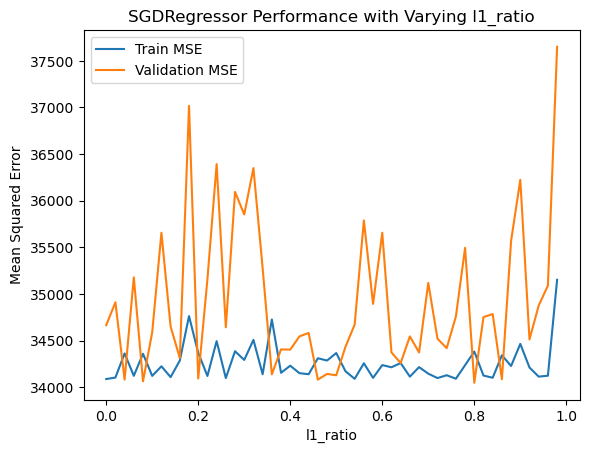

In [37]:
l1_ratio_range = np.arange(0, 1, 0.02)  # Example range of l1_ratio values
train_mse = []
val_mse = []

for l1_ratio in l1_ratio_range:
    sgd_reg = SGDRegressor(loss='squared_error', alpha=0.02, penalty='elasticnet', l1_ratio=l1_ratio, fit_intercept=True)
    sgd_reg.fit(X_train, y_train)
    
    y_train_pred = sgd_reg.predict(X_train)
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mse.append(train_error)
    
    y_val_pred = sgd_reg.predict(X_val)
    val_error = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mse.append(val_error)
    
    print(f"l1_ratio: {l1_ratio}, Train MSE: {train_error}, Validation MSE: {val_error}")

# Plotting
plt.plot(l1_ratio_range, train_mse, label='Train MSE')
plt.plot(l1_ratio_range, val_mse, label='Validation MSE')
plt.xlabel('l1_ratio')
plt.ylabel('Mean Squared Error')
plt.title('SGDRegressor Performance with Varying l1_ratio')
plt.legend()
plt.show()


In [48]:
def evaluate_model_on_val(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_val_pred = model.predict(X_val)
    val_error = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"Train MSE: {train_error}, Validation MSE: {val_error}")
    

In [49]:
sgd_reg = SGDRegressor(loss='squared_error', alpha=0.02, penalty='elasticnet', l1_ratio=0.2, fit_intercept=True)
evaluate_model_on_val(sgd_reg, X_train, y_train, X_val, y_val)

Train MSE: 34108.539717360116, Validation MSE: 34742.48544126039


In [40]:
param_grid = {
    'n_estimators': [30, 50, 100],  # Number of trees in the forest
    'max_depth': [None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [4, 6],  # Minimum number of samples required at each leaf node
    'max_features': ['log2']  # Number of features to consider when looking for the best split
}

# Instantiate RandomForestRegressor
rf_reg = RandomForestRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_reg,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',
                           verbose=1)  # Optionally print progress

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print best parameters and corresponding RMSE
print(grid_search.best_params_)
print(np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
30627.44310883725


max_depth: 2, Train MSE: 22690.526366818252, Validation MSE: 31746.15783253504
max_depth: 3, Train MSE: 22807.345951189196, Validation MSE: 31683.278399307736
max_depth: 4, Train MSE: 22786.3398975787, Validation MSE: 31671.869110510244
max_depth: 5, Train MSE: 22930.72881209052, Validation MSE: 31832.078475174647
max_depth: 6, Train MSE: 22782.510526665817, Validation MSE: 31980.60942539664
max_depth: 7, Train MSE: 22869.211031422365, Validation MSE: 31981.85830497355
max_depth: 8, Train MSE: 22674.034189771643, Validation MSE: 31756.934475748905
max_depth: 9, Train MSE: 22556.25357434978, Validation MSE: 31481.845211001524
max_depth: 10, Train MSE: 22884.84291405648, Validation MSE: 31731.455599439116
max_depth: 11, Train MSE: 22836.902656992068, Validation MSE: 32009.89659007161
max_depth: 12, Train MSE: 23169.53619018943, Validation MSE: 31765.29089430722
max_depth: 13, Train MSE: 23402.283268007766, Validation MSE: 32038.247413594872
max_depth: 14, Train MSE: 23636.570134116555, V

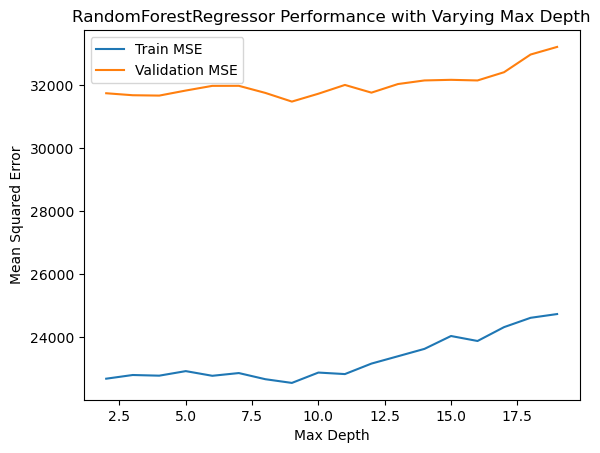

In [43]:
max_depth_range = range(2,20,1)  # Example range of max_depth values

train_mse = []
val_mse = []

for max_depth_value in max_depth_range:
    rf_reg = RandomForestRegressor(n_estimators=250,
                                    max_depth=20,
                                    max_features=20,
                                    min_samples_leaf=5,
                                    min_samples_split=max_depth_value)
    rf_reg.fit(X_train, y_train)

    y_train_pred = rf_reg.predict(X_train)
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mse.append(train_error)

    y_val_pred = rf_reg.predict(X_val)
    val_error = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mse.append(val_error)

    print(f"max_depth: {max_depth_value}, Train MSE: {train_error}, Validation MSE: {val_error}")

# Plotting
plt.plot(max_depth_range, train_mse, label='Train MSE')
plt.plot(max_depth_range, val_mse, label='Validation MSE')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('RandomForestRegressor Performance with Varying Max Depth')
plt.legend()
plt.show()


linear: C 1800
poly: C: 100 coef0 = 4


In [44]:
svr_linear_reg = SVR(kernel='linear', gamma='scale', shrinking=False, C=1800)
svr_poly_reg = SVR(kernel='poly', gamma='auto', coef0=4, degree=3, C=100)
rf_reg = RandomForestRegressor(n_estimators=250,
                                    max_depth=20,
                                    max_features=20,
                                    min_samples_leaf=5,
                                    min_samples_split=10)
evaluate_model(final_train_data, y, svr_linear_reg, "svr_linear_reg")
evaluate_model(final_train_data, y, svr_poly_reg, "svr_poly_reg")
evaluate_model(final_train_data, y, rf_reg, "rf_reg")

RMSE on svr_linear_reg 33763.789991951504
RMSE on svr_poly_reg 33578.82968868829
RMSE on rf_reg 30662.35756013415


In [94]:
evaluate_model_on_val(svr_linear_reg, X_train, y_train, X_val, y_val)
evaluate_model_on_val(svr_poly_reg, X_train, y_train, X_val, y_val)
evaluate_model_on_val(rf_reg, X_train, y_train, X_val, y_val)
evaluate_model_on_val(sgd_reg, X_train, y_train, X_val, y_val)

Train MSE: 35007.12791138543, Validation MSE: 35012.30585968972
Train MSE: 28585.237582369286, Validation MSE: 29418.34931214411
Train MSE: 22785.43325576973, Validation MSE: 31836.88318788258
Train MSE: 34197.39323783342, Validation MSE: 35456.9299046568


In [51]:
raw_test_data = pd.read_csv("test.csv")

raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [55]:
test_num_col = [i for i in num_cols if i != 'SalePrice']
cate_test_raw_data = raw_test_data[cate_cols]
num_test_raw_data = raw_test_data[test_num_col]


In [57]:
from sklearn.impute import SimpleImputer

# Assuming you already have num_cols and num_test_raw_data defined from previous steps

# Identify columns with missing values
null_numerical_cols = [i for i in test_num_col if num_test_raw_data[i].isnull().sum() > 0]

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on num_test_raw_data (only the columns with missing values)
imputer.fit(num_test_raw_data[null_numerical_cols])

# Transform num_test_raw_data to fill missing values (only in relevant columns)
filled_num_test_data = imputer.transform(num_test_raw_data[null_numerical_cols])

# Convert the filled data back into a DataFrame
filled_num_test_data = pd.DataFrame(filled_num_test_data, 
                                     columns=null_numerical_cols)  

# Optionally, join back with the original data for unchanged columns:
filled_num_test_data = pd.concat([
    num_test_raw_data.drop(null_numerical_cols, axis=1),  # Original data without missing value columns
    filled_num_test_data
], axis=1)



In [59]:
cate_test_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1457 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1458 non-null   object
 15  Exterior2nd    1458 non-null   object
 16  ExterQual      1459 non-null   object
 17  ExterCond      1459 non-null   object
 18  Foundation     1459 non-null

In [60]:
processed_cate_test_data = pd.DataFrame()

def handle_a_col_of_clutter_test(clutter_col_name:str):
    processed_cate_test_data[clutter_col_name] = cate_test_raw_data[clutter_col_name]
    value_maps = {}
    for clut_groups in clutter_cols[clutter_col_name]:
        for clut_group in clut_groups:
            value_maps[clut_group] = clut_groups[0]
        pass
    processed_cate_test_data[clutter_col_name] = processed_cate_test_data[clutter_col_name].map(value_maps)
for col_name in clutter_cols:
    handle_a_col_of_clutter_test(col_name)

In [61]:
processed_cate_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   LotShape       1459 non-null   object
 2   LandContour    1459 non-null   object
 3   LotConfig      1459 non-null   object
 4   Neighborhood   1459 non-null   object
 5   BldgType       1459 non-null   object
 6   HouseStyle     1459 non-null   object
 7   Exterior1st    1458 non-null   object
 8   Exterior2nd    1458 non-null   object
 9   BsmtFinType1   1459 non-null   object
 10  GarageType     1459 non-null   object
 11  SaleType       1458 non-null   object
 12  SaleCondition  1459 non-null   object
dtypes: object(13)
memory usage: 148.3+ KB


In [62]:
# there are a few of cols that have missing values
# fill them with the most common value
for col in processed_cate_test_data.columns:
    most_common_value = processed_cate_test_data[col].mode()[0]
    processed_cate_test_data[col] = processed_cate_test_data[col].fillna(most_common_value)
processed_cate_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotShape       1460 non-null   object
 2   LandContour    1460 non-null   object
 3   LotConfig      1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   BldgType       1460 non-null   object
 6   HouseStyle     1460 non-null   object
 7   Exterior1st    1460 non-null   object
 8   Exterior2nd    1460 non-null   object
 9   BsmtFinType1   1460 non-null   object
 10  GarageType     1460 non-null   object
 11  SaleType       1460 non-null   object
 12  SaleCondition  1460 non-null   object
dtypes: object(13)
memory usage: 148.4+ KB


In [63]:
cate_num_test_data = pd.DataFrame()
def handle_a_col_of_cate_num(cate_num:str):
    cate_num_test_data[cate_num] = cate_test_raw_data[cate_num]
    cate_num_test_data[cate_num] = cate_num_test_data[cate_num].map(numericalize_cols[cate_num])
for col_name in numericalize_cols:
    handle_a_col_of_cate_num(col_name)
cate_num_test_data.columns

Index(['HeatingQC', 'KitchenQual', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'GarageFinish', 'PavedDrive', 'CentralAir'],
      dtype='object')

In [64]:
added_num_test_data = filled_num_test_data.copy()
added_num_test_data['TotalSF'] = raw_test_data['TotalBsmtSF'] + raw_test_data['1stFlrSF'] + raw_test_data['2ndFlrSF']
added_num_test_data['TotalBath'] = raw_test_data['FullBath'] + raw_test_data['HalfBath']
added_num_test_data['GapInSell'] = raw_test_data['YrSold'] - raw_test_data['YearBuilt']
added_num_test_data.drop(['FullBath','HalfBath','TotalBsmtSF','1stFlrSF','2ndFlrSF','YrSold','YearBuilt'],axis=1,inplace=True)

In [65]:
combined_num_test_data = pd.concat([pd.DataFrame(added_num_test_data), cate_num_test_data], axis=1)
for col in multiply_cols:
    combined_num_test_data[col] = combined_num_test_data[multiply_cols[col][0]] * combined_num_test_data[multiply_cols[col][1]]
    combined_num_test_data.drop(multiply_cols[col], axis=1, inplace=True)


In [79]:
selected_features_test= [i for i in selected_features if i != 'SalePrice']
selected_num_test_data = combined_num_test_data[selected_features_test]
# there are some missing values in the test data
# fill them with the mean value
selected_num_test_data = selected_num_test_data.fillna(selected_num_test_data.mean())
selected_num_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OverallQual     1459 non-null   int64  
 1   YearRemodAdd    1459 non-null   int64  
 2   GrLivArea       1459 non-null   int64  
 3   TotRmsAbvGrd    1459 non-null   int64  
 4   Fireplaces      1459 non-null   int64  
 5   GarageCars      1459 non-null   float64
 6   MasVnrArea      1459 non-null   float64
 7   GarageYrBlt     1459 non-null   float64
 8   TotalBath       1459 non-null   int64  
 9   GapInSell       1459 non-null   int64  
 10  HeatingQC       1459 non-null   int64  
 11  ExterQual       1459 non-null   int64  
 12  KitchenOverall  1459 non-null   float64
 13  BsmtOverall     1459 non-null   float64
 14  GarageOverall   1459 non-null   float64
dtypes: float64(6), int64(9)
memory usage: 171.1 KB


In [80]:
dummied_cate_test_data = pd.get_dummies(processed_cate_test_data)
dummied_cate_test_data

,MSZoning_FV,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_Lvl,LotConfig_FR2,LotConfig_Inside,Neighborhood_CollgCr,...,BsmtFinType1_ALQ,BsmtFinType1_GLQ,GarageType_Attchd,GarageType_Detchd,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,True,False,True,False,...,True,False,True,False,False,False,True,False,True,False
1,False,True,False,False,True,False,True,False,True,False,...,True,False,True,False,False,False,True,False,True,False
2,False,True,False,False,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,True,False
3,False,True,False,False,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,True,False
4,False,True,False,False,True,False,True,False,True,False,...,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
1455,False,False,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,True,True,False,False
1456,False,True,False,False,True,False,True,False,True,False,...,True,False,False,True,False,False,True,True,False,False
1457,False,True,False,False,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False


In [88]:
full_test_data = pd.concat([selected_num_test_data, dummied_cate_test_data], axis=1)
X_t = full_test_data 
X_t_scaled = scaler.transform(X_t)
X_t_df = pd.DataFrame(X_t_scaled, columns=full_test_data.columns)
final_test_data = X_t_df[top_fts]

In [90]:
def predict_to_file(X, model, raw_test_data, name):
    # Predicting
    y_pred = model.predict(X)
    
    # Creating DataFrame with predicted SalePrice
    result_df = pd.DataFrame({'SalePrice': y_pred}, columns=['SalePrice'])
    
    # Adding Id row from raw_test_data
    result_df['Id'] = raw_test_data['Id']
    
    # Reordering columns
    result_df = result_df[['Id', 'SalePrice']]
    
    # Exporting to CSV
    result_df.to_csv(f'{name}_predict.csv', index=False)

In [91]:
# predict_to_file(final_test_data, rf_reg, raw_test_data, "rf_reg")

In [95]:
predict_to_file(final_test_data, sgd_reg, raw_test_data, "sgd_reg")